In [17]:
# 自作モジュールへの変更を自動的にリロードするためのおまじない
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import lib.S2Z as stoz
import lib.Z_model as zmodel
import lib.Useful as usf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


治具になにもつけないではかった

C1 : 23.312576286514954 pF


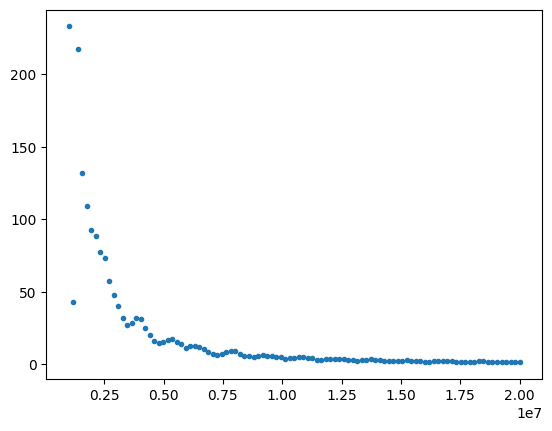

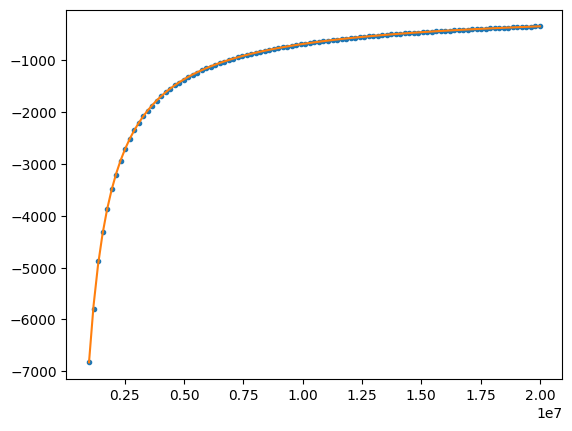

In [ ]:
data = np.loadtxt("../data/jigu_open_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.C_ideal_imag,freq,Z.imag,p0=[10e-12])

plt.plot(freq,Z.real,'.')
plt.figure()
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.C_ideal_imag(freq,*popt))
C1 = popt[0]

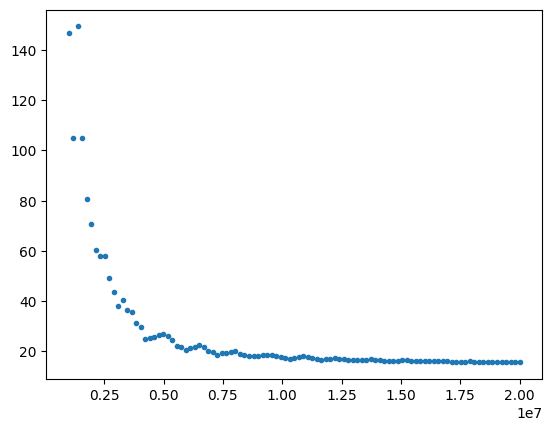

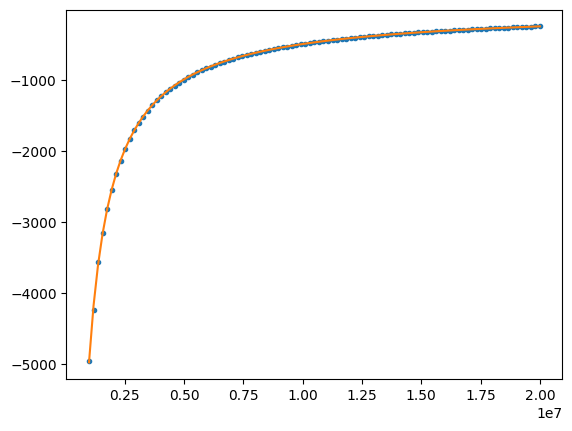

In [19]:
data = np.loadtxt("../data/jigu_resistance_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.C_ideal_imag,freq,Z.imag,p0=[10e-12])
plt.plot(freq,Z.real,'.')
plt.figure()
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.C_ideal_imag(freq,*popt))
C2 = popt[0] - C1

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

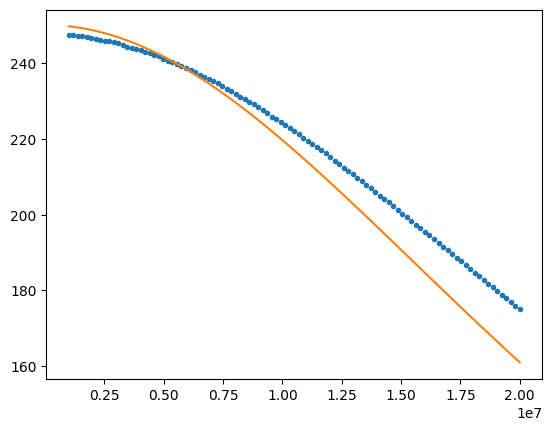

In [ ]:
data = np.loadtxt("../data/jigu_res_and_load_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)

plt.plot(freq,Z.real,'.')
popt,pcov = curve_fit(zmodel.JG_R_real,freq,Z.real,p0=[C1,200,C2,50])

plt.plot(freq,zmodel.JG_R_real(freq,*popt))
print(popt)
plt.figure()
popt,pcov = curve_fit(zmodel.JG_R_imag,freq,Z.imag,p0=[C1,200,C2,50],)
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.JG_R_imag(freq,*popt))
print(popt)

<Figure size 640x480 with 0 Axes>

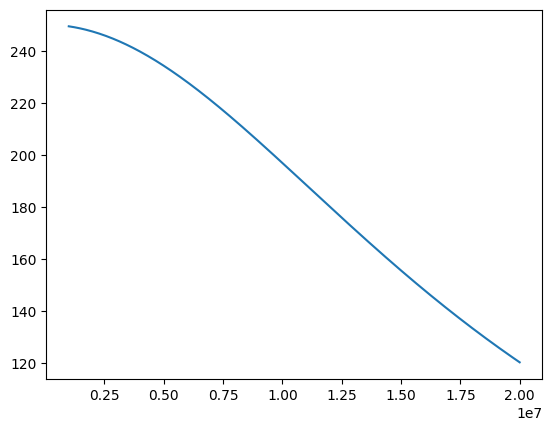

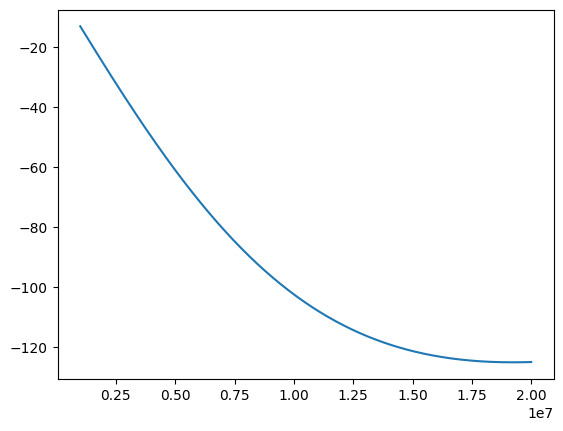

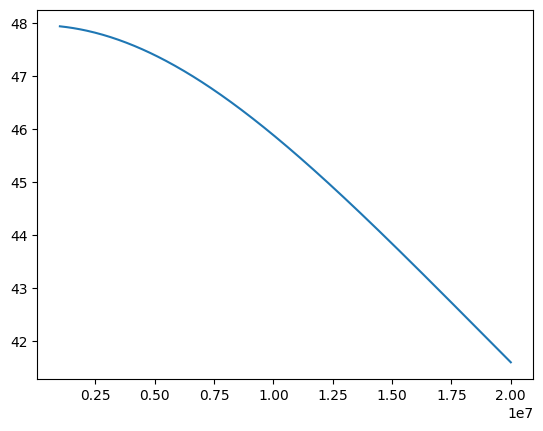

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(freq,zmodel.JG_R(freq,C1,200,C2,50).real)
plt.figure()
plt.plot(freq,zmodel.JG_R(freq,C1,200,C2,50).imag)
plt.figure()
# plt.plot(freq,usf.db(zmodel.JG_R(freq,C1,200,C2,50).real))
# plt.figure()

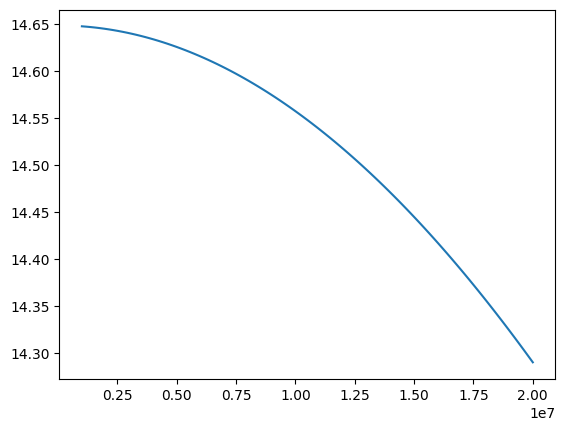

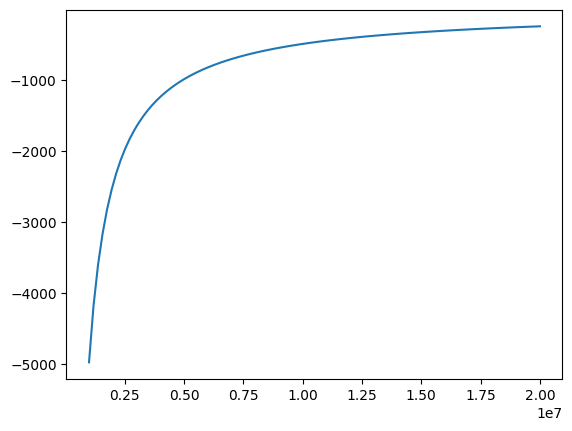

In [22]:
plt.plot(freq,zmodel.JG_R(freq,C1,200,C2,np.inf).real)
plt.figure()
plt.plot(freq,zmodel.JG_R(freq,C1,200,C2,np.inf).imag)

結果まとめ

In [30]:
print("C1      :",C1*1e12,"pF")
print("C2      :",C2*1e12,"pF")
print("C1 + C2 :",(C1+C2)*1e12,"pF")

C1      : 23.312576286514954 pF
C2      : 8.65039225668698 pF
C1 + C2 : 31.962968543201935 pF


ロードとport1を付け替える

3.2754495799216635e-11


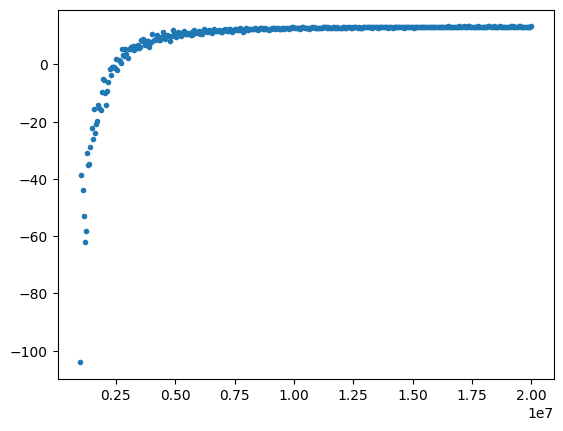

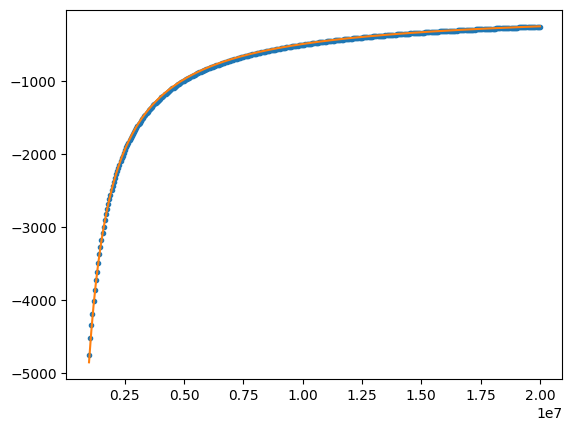

In [23]:
data = np.loadtxt("../data/jigu_res_open_swap_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.C_ideal_imag,freq,Z.imag,p0=[10e-12])

plt.plot(freq,Z.real,'.')
plt.figure()
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.C_ideal_imag(freq,*popt))
C1 = popt[0]
print(C1)

[-2.18745132e-11  2.30269940e+02  5.66687660e-10  1.77999357e+01]
[2.33486675e-11 2.35207469e+02 5.06841751e-08 1.72408139e+00]


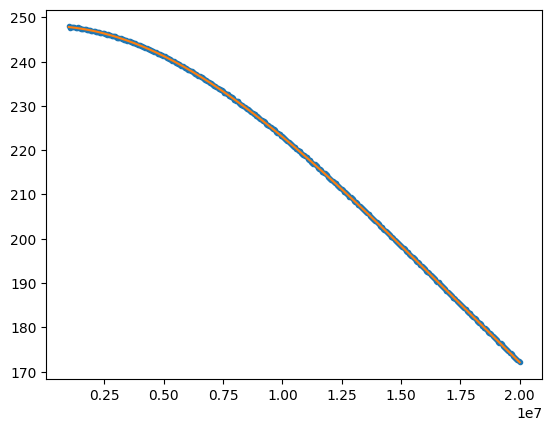

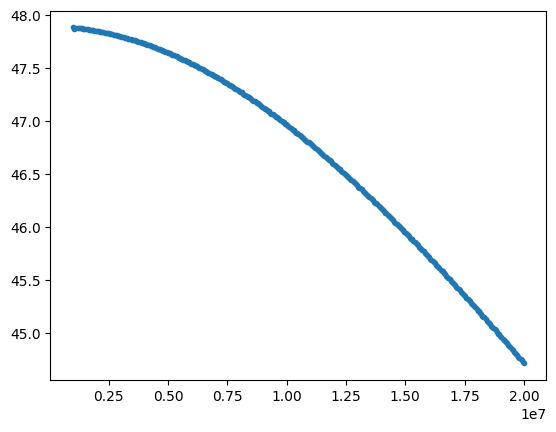

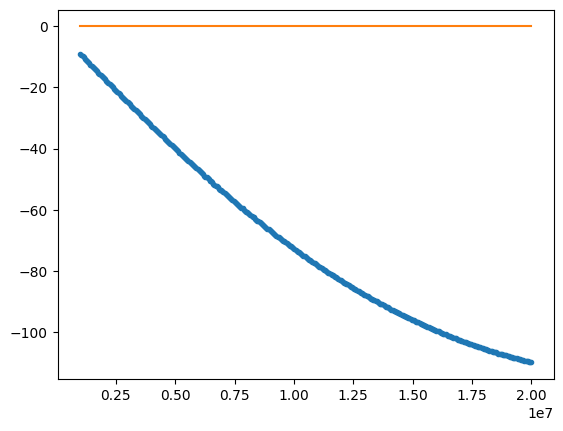

In [ ]:
data = np.loadtxt("../data/jigu_res_and_load_swap_1-20MHz_2026_02_16.s1p",delimiter=' ')
freq , Z = stoz.direct(data)
popt,pcov = curve_fit(zmodel.JG_R_real,freq,Z.real,p0=[10e-12,200, 20e-12,50])
plt.plot(freq,Z.real,'.')
plt.plot(freq,zmodel.JG_R_real(freq,*popt).real)
print(popt)
plt.figure()
# plt.plot(freq,usf.db(Z.real),'.')
# plt.figure()
popt,pcov = curve_fit(zmodel.JG_R_imag,freq,Z.imag,p0=[10e-12,200, 20e-12,50])
plt.plot(freq,Z.imag,'.')
plt.plot(freq,zmodel.JG_R_imag(freq,*popt).imag)
print(popt)